<a href="https://colab.research.google.com/github/nikhilbordekar/8-Week-SQL-Challenge/blob/main/8_Weeks_SQL_Challenge_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY #2 PIZZA RUNNER**

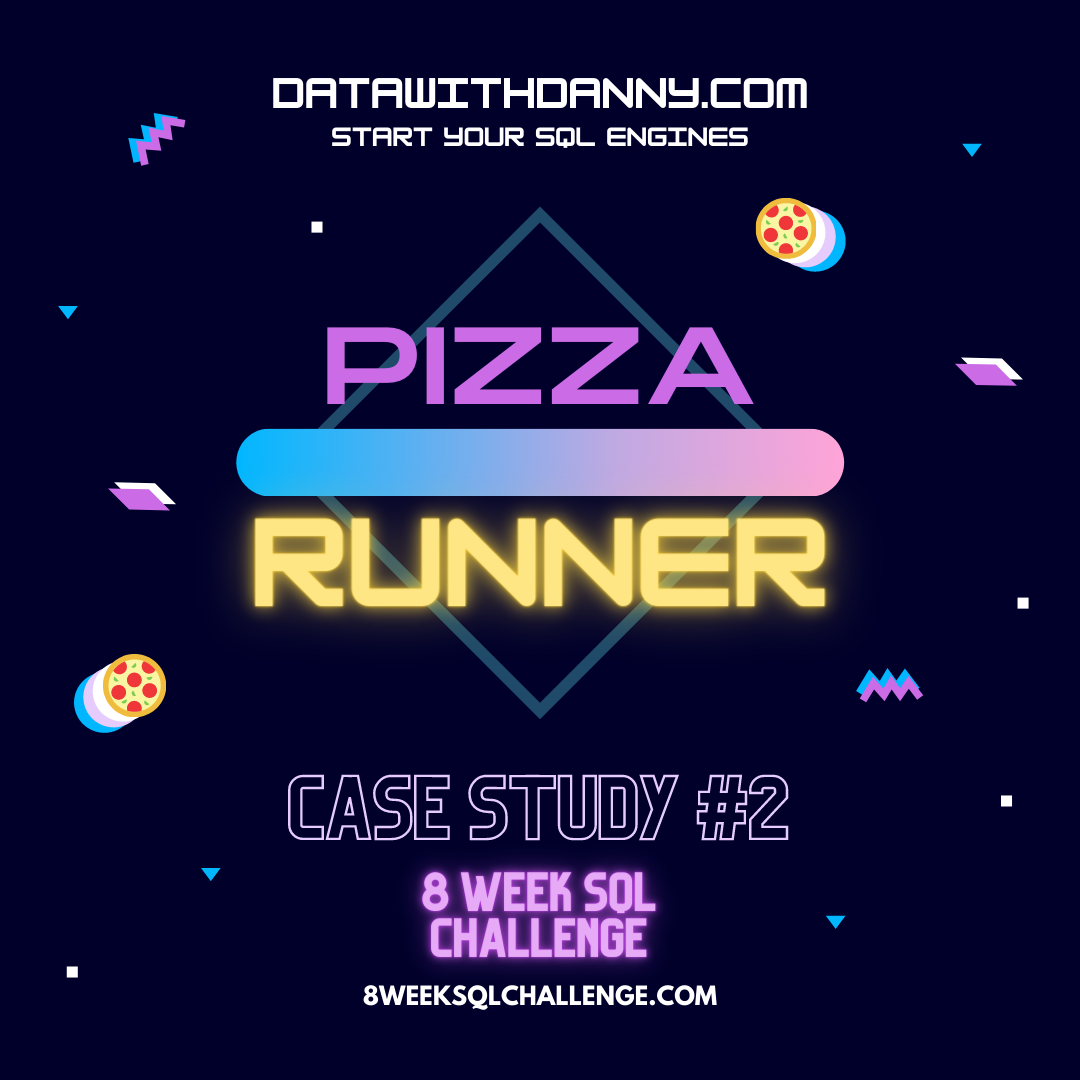

**Introduction**

Did you know that over 115 million kilograms of pizza is consumed daily worldwide??? (Well according to Wikipedia anyway…)

Danny was scrolling through his Instagram feed when something really caught his eye - “80s Retro Styling and Pizza Is The Future!”

Danny was sold on the idea, but he knew that pizza alone was not going to help him get seed funding to expand his new Pizza Empire - so he had one more genius idea to combine with it - he was going to Uberize it - and so Pizza Runner was launched!

Danny started by recruiting “runners” to deliver fresh pizza from Pizza Runner Headquarters (otherwise known as Danny’s house) and also maxed out his credit card to pay freelance developers to build a mobile app to accept orders from customers.

**Available Data**

Because Danny had a few years of experience as a data scientist - he was very aware that data collection was going to be critical for his business’ growth.

He has prepared for us an entity relationship diagram of his database design but requires further assistance to clean his data and apply some basic calculations so he can better direct his runners and optimise Pizza Runner’s operations.

All datasets exist within the pizza_runner database schema - be sure to include this reference within your SQL scripts as you start exploring the data and answering the case study questions.

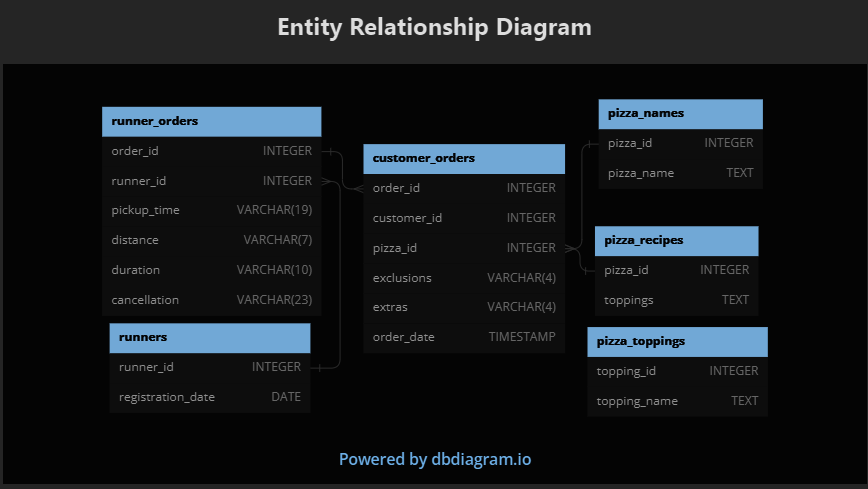

**Table 1: runners**

The runners table shows the registration_date for each new runner


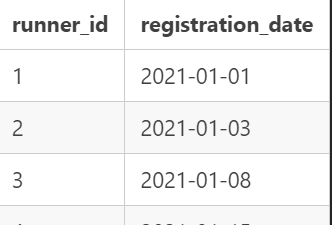


 **Table 2: customer_orders**

Customer pizza orders are captured in the customer_orders table with 1 row for each individual pizza that is part of the order.


The pizza_id relates to the type of pizza which was ordered whilst the exclusions are the ingredient_id values which should be removed from the pizza and the extras are the ingredient_id values which need to be added to the pizza.


Note that customers can order multiple pizzas in a single order with varying exclusions and extras values even if the pizza is the same type!


The exclusions and extras columns will need to be cleaned up before using them in your queries.



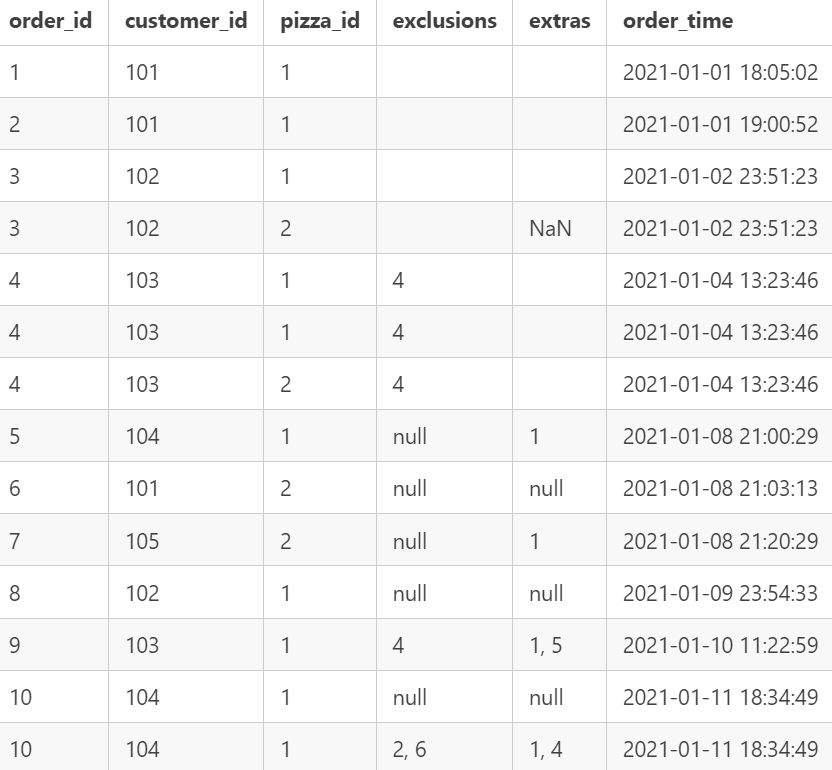



**Table 3: runner_orders**


After each orders are received through the system - they are assigned to a runner - however not all orders are fully completed and can be cancelled by the restaurant or the customer.


The pickup_time is the timestamp at which the runner arrives at the Pizza Runner headquarters to pick up the freshly cooked pizzas. The distance and duration fields are related to how far and long the runner had to travel to deliver the order to the respective customer.


There are some known data issues with this table so be careful when using this in your queries - make sure to check the data types for each column in the schema SQL!



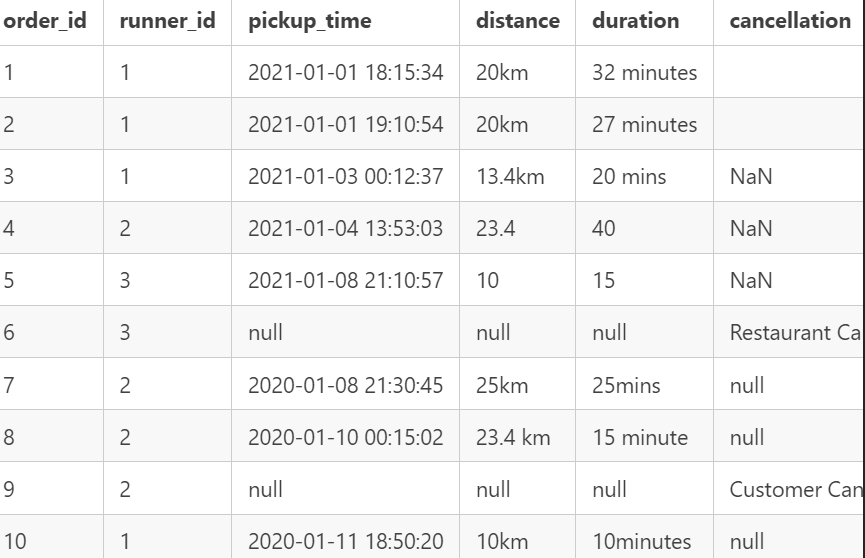


**Table 4: pizza_names**



At the moment - Pizza Runner only has 2 pizzas available the Meat Lovers or Vegetarian!



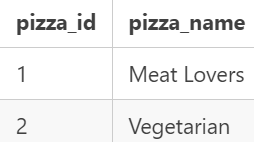


**Table 5: pizza_recipes**



Each pizza_id has a standard set of toppings which are used as part of the pizza recipe.



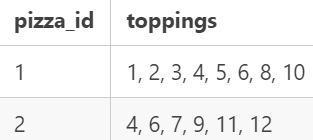


**Table 6: pizza_toppings**


This table contains all of the topping_name values with their corresponding topping_id value



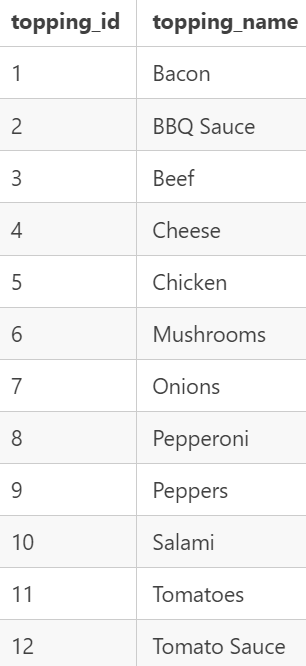

```SQL
DROP TABLE IF EXISTS customer_orders;
CREATE TABLE customer_orders (
  "order_id" INTEGER,
  "customer_id" INTEGER,
  "pizza_id" INTEGER,
  "exclusions" VARCHAR(4),
  "extras" VARCHAR(4),
  "order_time" TIMESTAMP
);

INSERT INTO customer_orders
  ("order_id", "customer_id", "pizza_id", "exclusions", "extras", "order_time")
VALUES
  ('1', '101', '1', '', '', '2020-01-01 18:05:02'),
  ('2', '101', '1', '', '', '2020-01-01 19:00:52'),
  ('3', '102', '1', '', '', '2020-01-02 23:51:23'),
  ('3', '102', '2', '', NULL, '2020-01-02 23:51:23'),
  ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
  ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
  ('4', '103', '2', '4', '', '2020-01-04 13:23:46'),
  ('5', '104', '1', 'null', '1', '2020-01-08 21:00:29'),
  ('6', '101', '2', 'null', 'null', '2020-01-08 21:03:13'),
  ('7', '105', '2', 'null', '1', '2020-01-08 21:20:29'),
  ('8', '102', '1', 'null', 'null', '2020-01-09 23:54:33'),
  ('9', '103', '1', '4', '1, 5', '2020-01-10 11:22:59'),
  ('10', '104', '1', 'null', 'null', '2020-01-11 18:34:49'),
  ('10', '104', '1', '2, 6', '1, 4', '2020-01-11 18:34:49');


DROP TABLE IF EXISTS runner_orders;
CREATE TABLE runner_orders (
  "order_id" INTEGER,
  "runner_id" INTEGER,
  "pickup_time" VARCHAR(19),
  "distance" VARCHAR(7),
  "duration" VARCHAR(10),
  "cancellation" VARCHAR(23)
);

INSERT INTO runner_orders
  ("order_id", "runner_id", "pickup_time", "distance", "duration", "cancellation")
VALUES
  ('1', '1', '2020-01-01 18:15:34', '20km', '32 minutes', ''),
  ('2', '1', '2020-01-01 19:10:54', '20km', '27 minutes', ''),
  ('3', '1', '2020-01-03 00:12:37', '13.4km', '20 mins', NULL),
  ('4', '2', '2020-01-04 13:53:03', '23.4', '40', NULL),
  ('5', '3', '2020-01-08 21:10:57', '10', '15', NULL),
  ('6', '3', 'null', 'null', 'null', 'Restaurant Cancellation'),
  ('7', '2', '2020-01-08 21:30:45', '25km', '25mins', 'null'),
  ('8', '2', '2020-01-10 00:15:02', '23.4 km', '15 minute', 'null'),
  ('9', '2', 'null', 'null', 'null', 'Customer Cancellation'),
  ('10', '1', '2020-01-11 18:50:20', '10km', '10minutes', 'null');


DROP TABLE IF EXISTS pizza_names;
CREATE TABLE pizza_names (
  "pizza_id" INTEGER,
  "pizza_name" TEXT
);
INSERT INTO pizza_names
  ("pizza_id", "pizza_name")
VALUES
  (1, 'Meatlovers'),
  (2, 'Vegetarian');


DROP TABLE IF EXISTS pizza_recipes;
CREATE TABLE pizza_recipes (
  "pizza_id" INTEGER,
  "toppings" TEXT
);
INSERT INTO pizza_recipes
  ("pizza_id", "toppings")
VALUES
  (1, '1, 2, 3, 4, 5, 6, 8, 10'),
  (2, '4, 6, 7, 9, 11, 12');


DROP TABLE IF EXISTS pizza_toppings;
CREATE TABLE pizza_toppings (
  "topping_id" INTEGER,
  "topping_name" TEXT
);
INSERT INTO pizza_toppings
  ("topping_id", "topping_name")
VALUES
  (1, 'Bacon'),
  (2, 'BBQ Sauce'),
  (3, 'Beef'),
  (4, 'Cheese'),
  (5, 'Chicken'),
  (6, 'Mushrooms'),
  (7, 'Onions'),
  (8, 'Pepperoni'),
  (9, 'Peppers'),
  (10, 'Salami'),
  (11, 'Tomatoes'),
  (12, 'Tomato Sauce');
  ```

# **Case Study Questions**

# **A. Pizza Metrics**

**1. How many pizzas were ordered?**

```sql
select
      count(order_id) as Pizzas_ordered
from customer_orders
```

**Answer**

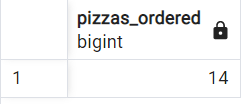

**2. How many unique customer orders were made?**

```sql
select
      count(distinct(order_id)) as unique_order_count
from customer_orders
```

**Answer**

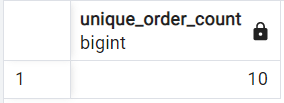

**3. How many successful orders were delivered by each runner?**

```sql
select
      runner_id,  
      count(*) as successful_orders
from runner_orders
where pickup_time != 'null'
group by runner_id
order by runner_id
```

**Answer**

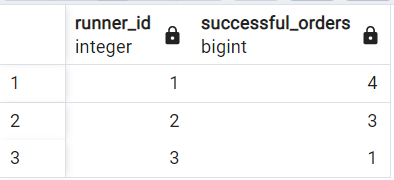

**4. How many of each type of pizza was delivered?**

```sql
SELECT
      p.pizza_name,
      COUNT(c.pizza_id) AS delivered_pizza_count
FROM customer_orders AS c
JOIN runner_orders AS r
  ON c.order_id = r.order_id
JOIN pizza_names AS p
  ON c.pizza_id = p.pizza_id
WHERE r.pickup_time != 'null'
GROUP BY p.pizza_name;
```

**Answer**

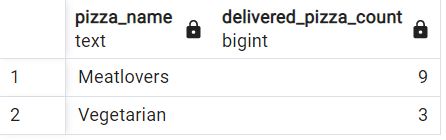

**5. How many Vegetarian and Meatlovers were ordered by each customer?**

```sql
select
		c.customer_id,
		p.pizza_name,
		count(c.customer_id) as pizza_count
from customer_orders c
join pizza_names p on c.pizza_id = p.pizza_id
group by c.customer_id, p.pizza_name
order by c.customer_id
```

**Answer**

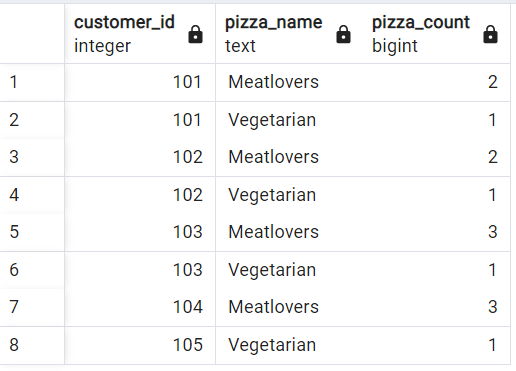

**6. What was the maximum number of pizzas delivered in a single order?**



**Answer**